# Introduction

## Libraries

In [ ]:
# Libraries

import pandas as pd
import numpy as np 

#import plotting + diagram tools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(display= 'diagram')
import plotly.offline as py
%matplotlib inline

#resampling library
from imblearn.over_sampling import SMOTE

#import some necessary tools
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_selector, make_column_transformer

from sklearn.model_selection import train_test_split, GridSearchCV, \
cross_val_score,cross_val_predict
from collections import Counter
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, \
StandardScaler
from sklearn.impute import SimpleImputer

#import evaluation metrics: accuracy, precision, recall, classification report, and confusion matrix scoring functions

from sklearn.metrics import accuracy_score, precision_score, recall_score, \
f1_score, classification_report,confusion_matrix,plot_confusion_matrix, \
roc_auc_score, ConfusionMatrixDisplay,PrecisionRecallDisplay, RocCurveDisplay

#Importing the Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Supress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.filterwarnings(action='once')

## Functions ▶ ▶

## Preparing Dataset for ML 🧱

### Initial Inspection 🔎

In [ ]:
#Source : https://www.kaggle.com/code/shohanursobuj/car-insurance-eda-prediction-85-45-acc
link = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTsfFhSRZcQ3UuawTlDAvc6lW_ujPRlBBaz_dXH1ZV69Uz9dLoF3X7x0oivLSrtimjrr5RcRPycFVla/pub?output=csv'


In [ ]:
claims = pd.read_csv(link)

In [ ]:
claims.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


In [ ]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  int64  
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  int64  
 11  CHILDREN             10000 non-null  int64  
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [ ]:
print(f'The Dataset has {claims.shape[0]} rows and {claims.shape[1]} columns')

The Dataset has 10000 rows and 19 columns


In [ ]:
claims.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [ ]:
# Copy of the Dataset
df = claims.copy()

### Cleaning the Data 🧼 🧹

Duplicates

In [ ]:
df.duplicated().sum()

0

Missing Values

In [ ]:
df.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

Inconsistencies

In [ ]:
# Inspect all the categorical cols for data entry inconsistencies
for col in df.select_dtypes(include='object').columns:
  display(df[col].value_counts())
  print('\n')

26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: AGE, dtype: int64

female    5010
male      4990
Name: GENDER, dtype: int64

majority    9012
minority     988
Name: RACE, dtype: int64

0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64

high school    4157
university     3928
none           1915
Name: EDUCATION, dtype: int64

upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: INCOME, dtype: int64

before 2015    6967
after 2015     3033
Name: VEHICLE_YEAR, dtype: int64

sedan         9523
sports car     477
Name: VEHICLE_TYPE, dtype: int64

### Validation Split ✂

In [ ]:
target = df['OUTCOME']
# Features X:
X = df.drop(columns=['OUTCOME'])

# Target y :
y = target

## Exploaratory Data Analysis 📊

In [ ]:
# Making sure the Target is balanced
target.value_counts(normalize=True).round(2)

0    0.69
1    0.31
Name: OUTCOME, dtype: float64

No. of People who have never Filed Claims:  6867
No. of People who Filed Incident Claims:  3133


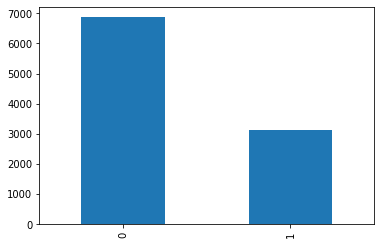

In [ ]:
target.value_counts().plot.bar()
print('No. of People who have never Filed Claims: ',N)
print('No. of People who Filed Incident Claims: ',Y)

In [ ]:
corr = df.corr()
threshold = 0.5
filter = np.abs(corr[target]) > threshold
corr_features = corr.columns[filter].tolist()
sns.clustermap(df[corr_features].corr(),
               annot = True,
               fmt = '.2f')
plt.title('Feature Correlations greater than .5 to target - diagnosis')

KeyError: ignored

Balanced Dataset

In [ ]:
df[''].plot.hist()